# Titanic Survival predictions

>Import the necessary packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
sns.set_style('darkgrid')
%matplotlib inline  
import re


>Data Preprocessing

In [7]:
data=pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data_to_drop = ['PassengerId','Name','Cabin','Embarked']
data.drop(columns=data_to_drop,inplace=True)

In [9]:
missing = data.isnull().sum().values.sum()
print(f'Missing data: {missing}')

Missing data: 87


In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,34.5,0,0,330911,7.8292
1,1,3,female,47.0,1,0,363272,7.0000
2,0,2,male,62.0,0,0,240276,9.6875
3,0,3,male,27.0,0,0,315154,8.6625
4,1,3,female,22.0,1,1,3101298,12.2875


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [12]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
dtype: int64

In [14]:
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [15]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
dtype: int64

In [16]:
data['Fare']=data['Fare'].fillna(data['Fare'].median())
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [17]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
data['Sex'] = data['Sex'].replace(['male'],1)
data['Sex'] = data['Sex'].replace(['female'],0)

data['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [19]:
data['Ticket'] = data['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

>Data Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_11472\1927653859.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], color = 'g')
C:\Users\HP\AppData\Local\Temp\ipykernel_11472\1927653859.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'], color = 'g')


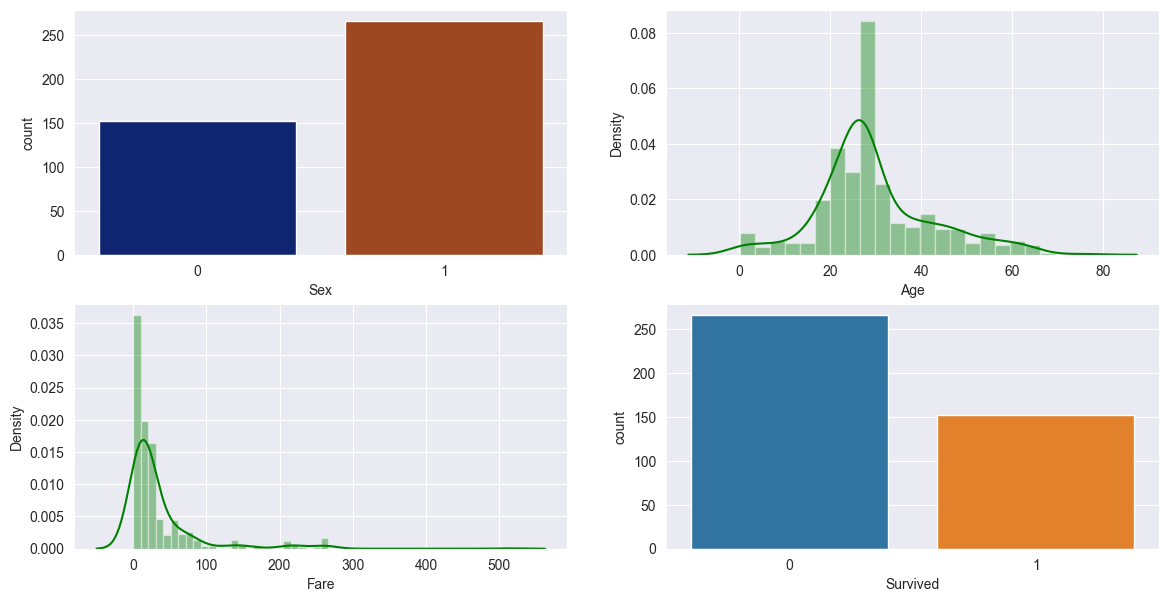

In [20]:
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.countplot(data= data,x='Sex',palette='dark')

plt.subplot(2,2,2)
sns.distplot(data['Age'], color = 'g')

plt.subplot(2,2,3)
sns.distplot(data['Fare'], color = 'g')

plt.subplot(2,2,4)
sns.countplot(data=data , x='Survived')
plt.show()


>Data Splitting

In [21]:
features=data.drop(columns= ['Survived'])
targets = data['Survived']
targets

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [22]:
x_train ,x_test ,y_train ,y_test = train_test_split(features,targets,test_size=0.4,random_state=1)
x_test,x_cv, y_test,y_cv= train_test_split(x_test,y_test,test_size=0.5,random_state=1)

print(f'Shape of x_train, y_train= {x_train.shape}, {y_train.shape}')
print(f'Shape of x_train, y_train= {x_cv.shape}, {y_cv.shape}')
print(f'Shape of x_test, y_test= {x_test.shape}, {y_test.shape}')

Shape of x_train, y_train= (250, 7), (250,)
Shape of x_train, y_train= (84, 7), (84,)
Shape of x_test, y_test= (84, 7), (84,)


In [23]:
scaler = StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_cv_scaled = scaler.fit_transform(x_cv)
x_test_scaled = scaler.transform(x_test)

>Model Train

In [24]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

>Model Evaluation

In [25]:
yhat=model.predict(x_train_scaled)
print(f'training mse = {mean_squared_error(y_train,yhat)/2}')
accu = accuracy_score(y_train,yhat)
print(f'The accuracy of x train= {accu*100}%')

training mse = 0.0
The accuracy of x train= 100.0%


In [26]:
model.fit(x_cv_scaled,y_cv)
yhat_cv= model.predict(x_cv_scaled)

print(f'cv mse = {mean_squared_error(y_cv,yhat_cv)/2}')
accu = accuracy_score(y_cv,yhat_cv)

print(f'The accuracy of x cv= {accu*100}%')

cv mse = 0.0
The accuracy of x cv= 100.0%


In [27]:
model.fit(x_cv_scaled,y_cv)
yhat_cv= model.predict(x_cv_scaled)

print(f'cv mse = {mean_squared_error(y_cv,yhat_cv)/2}')
accu = accuracy_score(y_cv,yhat_cv)

print(f'The accuracy of x cv= {accu*100}%')

cv mse = 0.0
The accuracy of x cv= 100.0%


In [28]:
model.fit(x_test_scaled,y_test)
yhat_test= model.predict(x_test_scaled)

print(f'test mse = {mean_squared_error(y_test,yhat_test)/2}')
accu = accuracy_score(y_test,yhat_test)

print(f'The accuracy of x test= {accu*100}%')

test mse = 0.0
The accuracy of x test= 100.0%
